# THE SPARKS FOUNDATION

## Data Science & Business Analytics Intern [GRIP FEB'21]

**Name:-** Karthikeyan .M.J

- LinkedIn : https://www.linkedin.com/in/karthikeyan-jagadeesan27/

- GitHub profile : https://github.com/Karthikeyan-MJ

**Task-2** >> Prediction Using Unsupervised ML.
- Find the Optimum Number of Clusters?
- Representing the Clusters Visually

**KMEANS CLUSTERING**
Used Python Scikit Learn (Sklearn) Library to Build the Kmeans Model

Source of Data :>> : https://bit.ly/3kXTdox

In [2]:
# Load required Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from warnings import filterwarnings
filterwarnings('ignore')
# import train-test split 
from sklearn.model_selection import train_test_split

# import 'stats'
from scipy import stats

# 'metrics' from sklearn is used for evaluating the model performance
from sklearn.metrics import mean_squared_error


# import functions to perform feature selection
#from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.feature_selection import RFE

# import function to perform linear regression
from sklearn.linear_model import LinearRegression

# import functions to perform cross validation
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
from statsmodels.tools.eval_measures import rmse
from statsmodels.formula.api import ols

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso, Ridge, LassoCV, RidgeCV 
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#Plotting Parameters
plt.rcParams['figure.figsize'] = [8,5]

# Collect and load data

In [5]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
df.shape

(150, 6)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


# Explore numeric variables - number summary

In [10]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


# Check the dataset for any missing values, value counts and print correlation matrix

In [11]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [14]:
df['Species'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

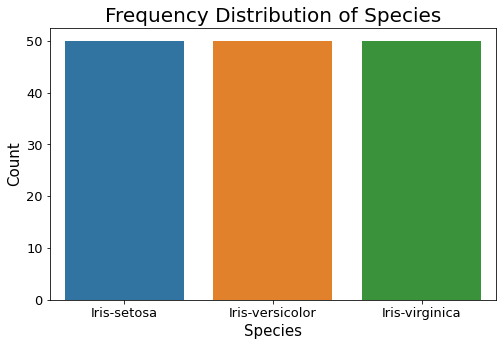

In [16]:
sns.countplot(df['Species'])
plt.title('Frequency Distribution of Species', fontsize = 20)
plt.xlabel('Species', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

plt.xticks(fontsize =13)
plt.yticks(fontsize =13)

plt.show()

In [17]:
df.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


(5.5, -0.5)

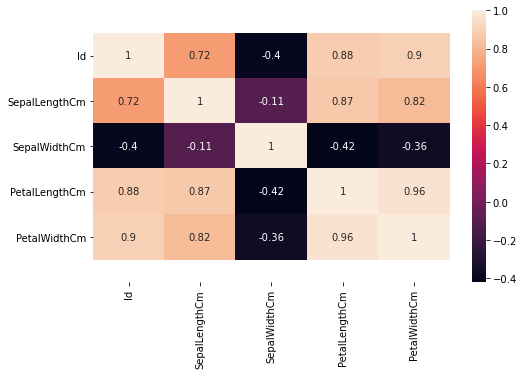

In [19]:
ax = sns.heatmap(df.corr(), annot = True)
bottom,top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top -0.5)

In [20]:
X= df.iloc[:,:-1].values


# Applying the elbow method to find the optimum number of clusters

In [21]:
from sklearn.cluster import KMeans
Within_Cluster_Sum_of_Squares = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, random_state = 10)
    kmeans.fit(X)
    
    # within cluster sum of squared error values
    Within_Cluster_Sum_of_Squares.append(kmeans.inertia_)

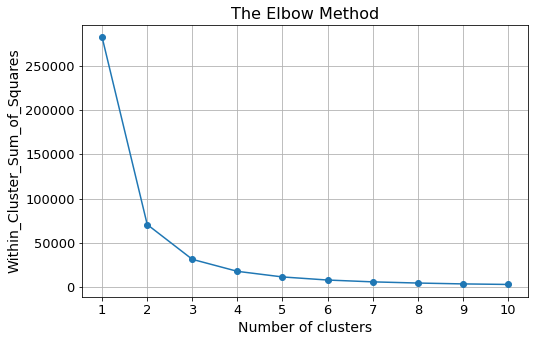

In [22]:
plt.plot(range(1,11), Within_Cluster_Sum_of_Squares, marker = 'o')

plt.title('The Elbow Method', fontsize = 16)
plt.xlabel('Number of clusters', fontsize = 14)
plt.ylabel('Within_Cluster_Sum_of_Squares', fontsize = 14)

plt.xticks(range(1,11),fontsize = 13)
plt.yticks(fontsize = 13)

plt.grid()
plt.show()

**INFERENCE :-**
- from the above graph we can decide the optimum number of clusters
- we get optimum number of clusters at a point where the 'y coordinate doesn't decrease sigificantly
- hence we can safely choose 3 clusters as optimal number of clusters
- From the Above graph we can clearly see the Elbow formation at 2 and 3, So selecting 3 as optimum Number of Clusters

# Applying the kmeans algorithm to our given dataset

In [23]:
km = KMeans(n_clusters = 3, random_state = 10)
y_kmeans = km.fit_predict(X)
km.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

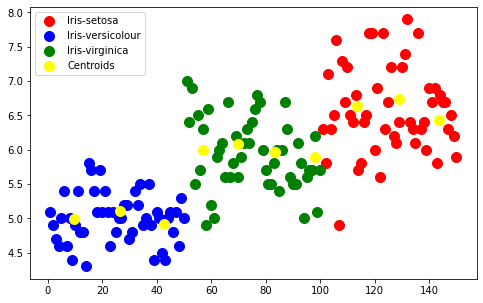

In [24]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')

plt.legend()
plt.show()

In [25]:
# Number of Iterations performed

km.n_iter_

5

In [27]:
# Adding the predictions to the dataframe  

data = df.copy()
data['Predicted_Species'] = km.labels_

In [28]:
# Function to Plot the clusters 

def cluster_plot(x,y):
    plt.figure(figsize = (12,6))

    for i in range(0,km.n_clusters):
        plt.scatter(x, y, cmap = 'tab10_r', 
                    data = data[data['Predicted_Species'] == i],
                    s = 100, label = i)

    if x == 'SepalLengthCm' and y == 'SepalWidthCm':
        a = 0
        b = 1
    else:
        a = 2
        b = 3
    
    plt.scatter(km.cluster_centers_[:, a], km.cluster_centers_[:, b],
                s = 550, c = 'red', marker = '*', label = 'Centeroid')

    plt.title('Predicted Clusters', fontsize = 16)
    plt.xlabel(x, fontsize = 14)
    plt.ylabel(y, fontsize = 14)

    plt.xticks(fontsize = 13)
    plt.yticks(fontsize = 13)

    plt.legend(loc = 0,fontsize = 12)
    plt.show()

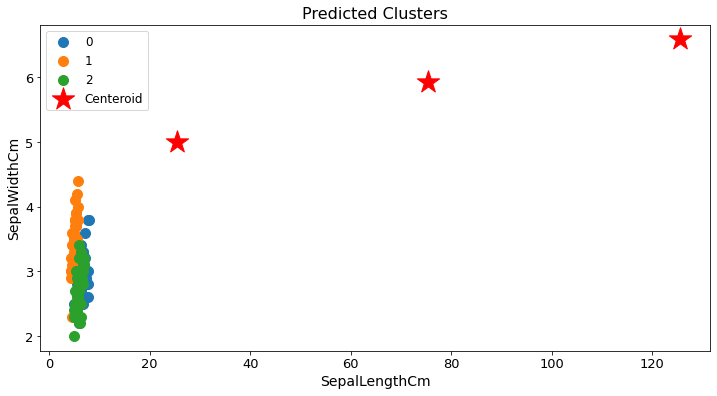

In [29]:
cluster_plot('SepalLengthCm','SepalWidthCm')

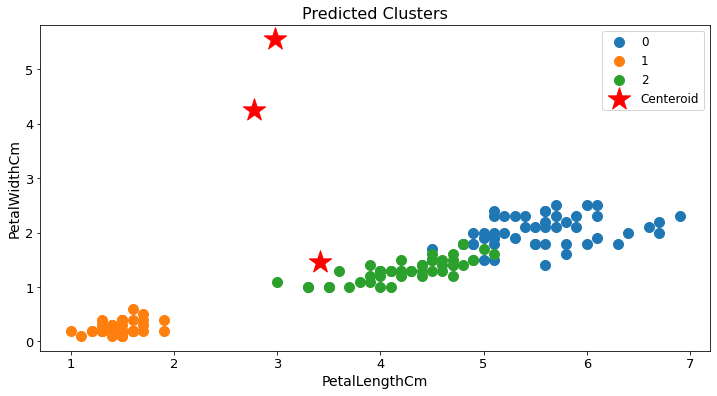

In [30]:
cluster_plot('PetalLengthCm','PetalWidthCm')

# Frequency Distribution of Predicted Clusters

2    50
1    50
0    50
Name: Predicted_Species, dtype: int64


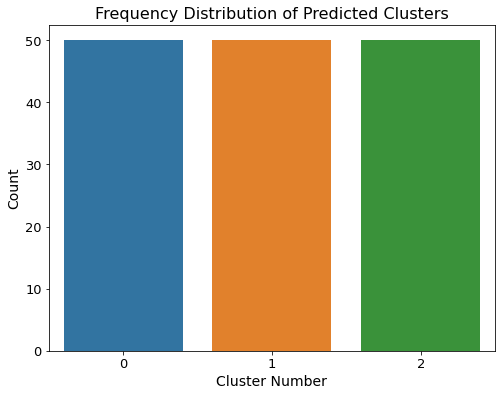

In [32]:
print(data['Predicted_Species'].value_counts())

plt.figure(figsize = (8,6))
sns.countplot(data['Predicted_Species']);
plt.title('Frequency Distribution of Predicted Clusters', fontsize = 16)
plt.xlabel('Cluster Number', fontsize = 14)
plt.ylabel('Count', fontsize = 14)

plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)

plt.show()

## Finding the Errors

In [33]:
for i in data['Species'].value_counts().index:
    
    print(i,'\n',data.loc[data['Species'] == i]['Predicted_Species'].value_counts(),'\n')


Iris-versicolor 
 2    50
Name: Predicted_Species, dtype: int64 

Iris-setosa 
 1    50
Name: Predicted_Species, dtype: int64 

Iris-virginica 
 0    50
Name: Predicted_Species, dtype: int64 



- Since we can see that for Iris-versicolor the majority prediction is cluster 0 For Iris-setosa it is cluster 1 while for Iris-virginica it is cluster 2

# Mapping to the cluster number based on majority prediction

In [34]:
data['Actual_Species'] = data['Species'].map({'Iris-versicolor':0, 'Iris-setosa':1, 'Iris-virginica':2})
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Predicted_Species,Actual_Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1,1
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1,1
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1,1
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1,1
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1,1


In [37]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(data['Actual_Species'], data['Predicted_Species']),'\n\n')
print('Classification Report\n\n0 -> Iris-versicolor\n1 -> Iris-setosa\n2 -> Iris-virginica\n')
print(classification_report(data['Actual_Species'], data['Predicted_Species']))

[[ 0  0 50]
 [ 0 50  0]
 [50  0  0]] 


Classification Report

0 -> Iris-versicolor
1 -> Iris-setosa
2 -> Iris-virginica

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       1.00      1.00      1.00        50
           2       0.00      0.00      0.00        50

    accuracy                           0.33       150
   macro avg       0.33      0.33      0.33       150
weighted avg       0.33      0.33      0.33       150

